In [167]:
import cv2
import glob
import matplotlib.pyplot as plt
import tifffile
import imagecodecs
import tifffile
from PIL import Image

In [168]:
indir = '/home/travis/data/season11/psii/psii_object_detection_1000_set/*.tif'

test_tifs = glob.glob(indir)

print(len(test_tifs))

import os
for i in test_tifs:

    filename = os.path.basename(i)
    new_filename = filename.replace('.tif', '.png')


    img = Image.open(i)
    img = np.array(img)

    img = img.astype('float32')

    cv2.imwrite(os.path.join('2000_psii_set_jpg', new_filename), img,[int(cv2.IMWRITE_JPEG_QUALITY), 200])
    # cv2.imwrite(os.path.join('2000_psii_set_jpg', new_filename), img)

2000


In [205]:
tif_img = Image.open(test_tifs[0])
tif_img = np.array(tif_img)


In [206]:
filename = os.path.basename(test_tifs[0])

jpg_name = filename.replace('.tif', '.png')

jpg_filepath = os.path.join('2000_psii_set_jpg', jpg_name)

# jpg_img = cv2.imread(jpg_filepath, cv2.IMREAD_UNCHANGED)

jpg_img = Image.open(jpg_filepath)
jpg_img = np.array(jpg_img)

In [207]:
tif_img[0][:5]

array([1., 4., 2., 4., 3.], dtype=float32)

In [208]:
jpg_img[0][:5]

array([1, 4, 2, 4, 3], dtype=uint8)

In [209]:
dif_arr = tif_img - jpg_img

In [210]:
import numpy as np
np.unique(dif_arr)

array([0.], dtype=float32)

In [211]:
np.sum(jpg_img != tif_img)

0

In [212]:
# jpg_img = jpg_img.astype('float32');jpg_img

In [213]:
print(tif_img[0])
print(jpg_img[0])

[1. 4. 2. ... 2. 3. 3.]
[1 4 2 ... 2 3 3]


In [214]:
tif_img[tif_img != jpg_img]

array([], dtype=float32)

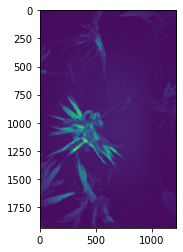

In [215]:
plt.imshow(tif_img)

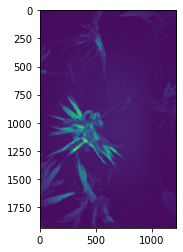

In [216]:
plt.imshow(jpg_img)

In [2]:

from PIL import Image
import glob
 
# Create the frames
frames = []
imgs = glob.glob("2000_psii_set_png/*.png")




for i in imgs[:10]:
    new_frame = Image.open(i)
    frames.append(new_frame)
 
# Save into a GIF file that loops forever
frames[0].save('png_to_gif.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=800, loop=0)





In [3]:
import geopandas as gpd
import glob
from shapely.geometry import Polygon, LineString, MultiPoint, Point



gdf = gpd.read_file('/home/travis/repos/psii/season11_multi_latlon_geno.geojson')

/home/travis/Downloads/yes/envs/general/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [4]:
images = glob.glob('/home/travis/data/temp/bin2tif_out/*');images[0]

'/home/travis/data/temp/bin2tif_out/4b15c3b1-f627-4a11-903c-9b46cb19d211_rawData0083.tif'

In [5]:
import cv2
import glob
import matplotlib.pyplot as plt
import tifffile
import imagecodecs
import tifffile
from PIL import Image
import numpy as np


img = Image.open(images[0])
img = np.array(img)

img = img.astype('float32')

In [7]:
import gdal
from gdalconst import GA_ReadOnly

data = gdal.Open(images[0], GA_ReadOnly)
geoTransform = data.GetGeoTransform()
minx = geoTransform[0]
maxy = geoTransform[3]
maxx = minx + geoTransform[1] * data.RasterXSize
miny = maxy + geoTransform[5] * data.RasterYSize
print( [minx, miny, maxx, maxy])

[-111.97502493537594, 33.075211405842325, -111.97500907003791, 33.075233089184714]


In [13]:
 polygon = Polygon([(minx, miny), (maxx, maxy), (minx, maxy), (maxx, miny)])

# [(4.812267, 52.328369), (4.823540, 52.456206), (5.050146, 52.458870), (5.081713, 52.317657)]

 gdf1 = gpd.GeoDataFrame(crs = {'init' :'epsg:4326'})
 gdf1.loc[0, 'geometry'] = polygon
 gdf1

/home/travis/Downloads/yes/envs/general/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
<ipython-input-13-31e814dc2dca>:5: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf1 = gpd.GeoDataFrame(crs = {'init' :'epsg:4326'})


,geometry
0,"POLYGON ((-111.97502 33.07521, -111.97501 33.0..."


In [16]:
polygon = Polygon([(minx, miny), (maxx, maxy), (minx, maxy), (maxx, miny)])
gdf[gdf.overlaps(polygon)]

,ID,genotype,geometry
634,2006,PI 678022,"POLYGON ((-111.97501 33.07521, -111.97502 33.0..."
635,2005,PI 678237,"POLYGON ((-111.97502 33.07521, -111.97502 33.0..."
636,2004,PI 678230,"POLYGON ((-111.97503 33.07521, -111.97503 33.0..."


<ipython-input-19-fa941df0de35>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: +init=epsg:4326 +type=crs

  merged = gpd.overlay(gdf, gdf1, how='intersection')


In [ ]:

from PIL import Image
import glob
 
# Create the frames
frames = []
imgs = glob.glob("2000_psii_set_png/*.png")

# plot level 



for i in imgs[:10]:
    new_frame = Image.open(i)
    frames.append(new_frame)
 
# Save into a GIF file that loops forever
frames[0].save('png_to_gif.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=800, loop=0)


In [20]:
# sorting
import glob
import subprocess
import shutil


all_dates = glob.glob('rgb_flir_plot_clip_geojson/clips/*');all_dates

if not os.path.exists('plot_sorting'):
    os.mkdir('plot_sorting')


for i in all_dates:
    plots = glob.glob(os.path.join(i, '*'))
    date = os.path.basename(i)
    print(date)
    
    
    for x in plots:
        

        plot = os.path.basename(x)

        plot_folder = os.path.join('plot_sorting', plot)

        if not os.path.exists(plot_folder):
            os.mkdir(plot_folder)


        images = glob.glob(os.path.join(x, '*'))
        cnt = 0
        for z in images:
        

            new_filename = date+'_'+plot +'_'+ str(cnt)+'.tif'
            # print(new_filename)
            shutil.copyfile(z, os.path.join(plot_folder, new_filename))


03_15
02_12_clip
02_18_clip


In [21]:
# make gifs once sorted


from PIL import Image
import glob
 
# Create the frames

# imgs = glob.glob("2000_psii_set_png/*.png")

# plot level 

if not os.path.exists('gifs'):
    os.mkdir('gifs')

plots = glob.glob('plot_sorting/*')

for i in plots:

    imgs = glob.glob(os.path.join(i, '*'))

    frames = []
    for x in imgs:
        new_frame = Image.open(x)
        frames.append(new_frame)
    
    # Save into a GIF file that loops forever
    try:
        frames[0].save(os.path.join('gifs', os.path.basename(i)+'.gif'), format='GIF',
                    append_images=frames[1:],
                    save_all=True,
                    duration=800, loop=0)

    except:
        print(plot, 'didnt work')


1624 didnt work
